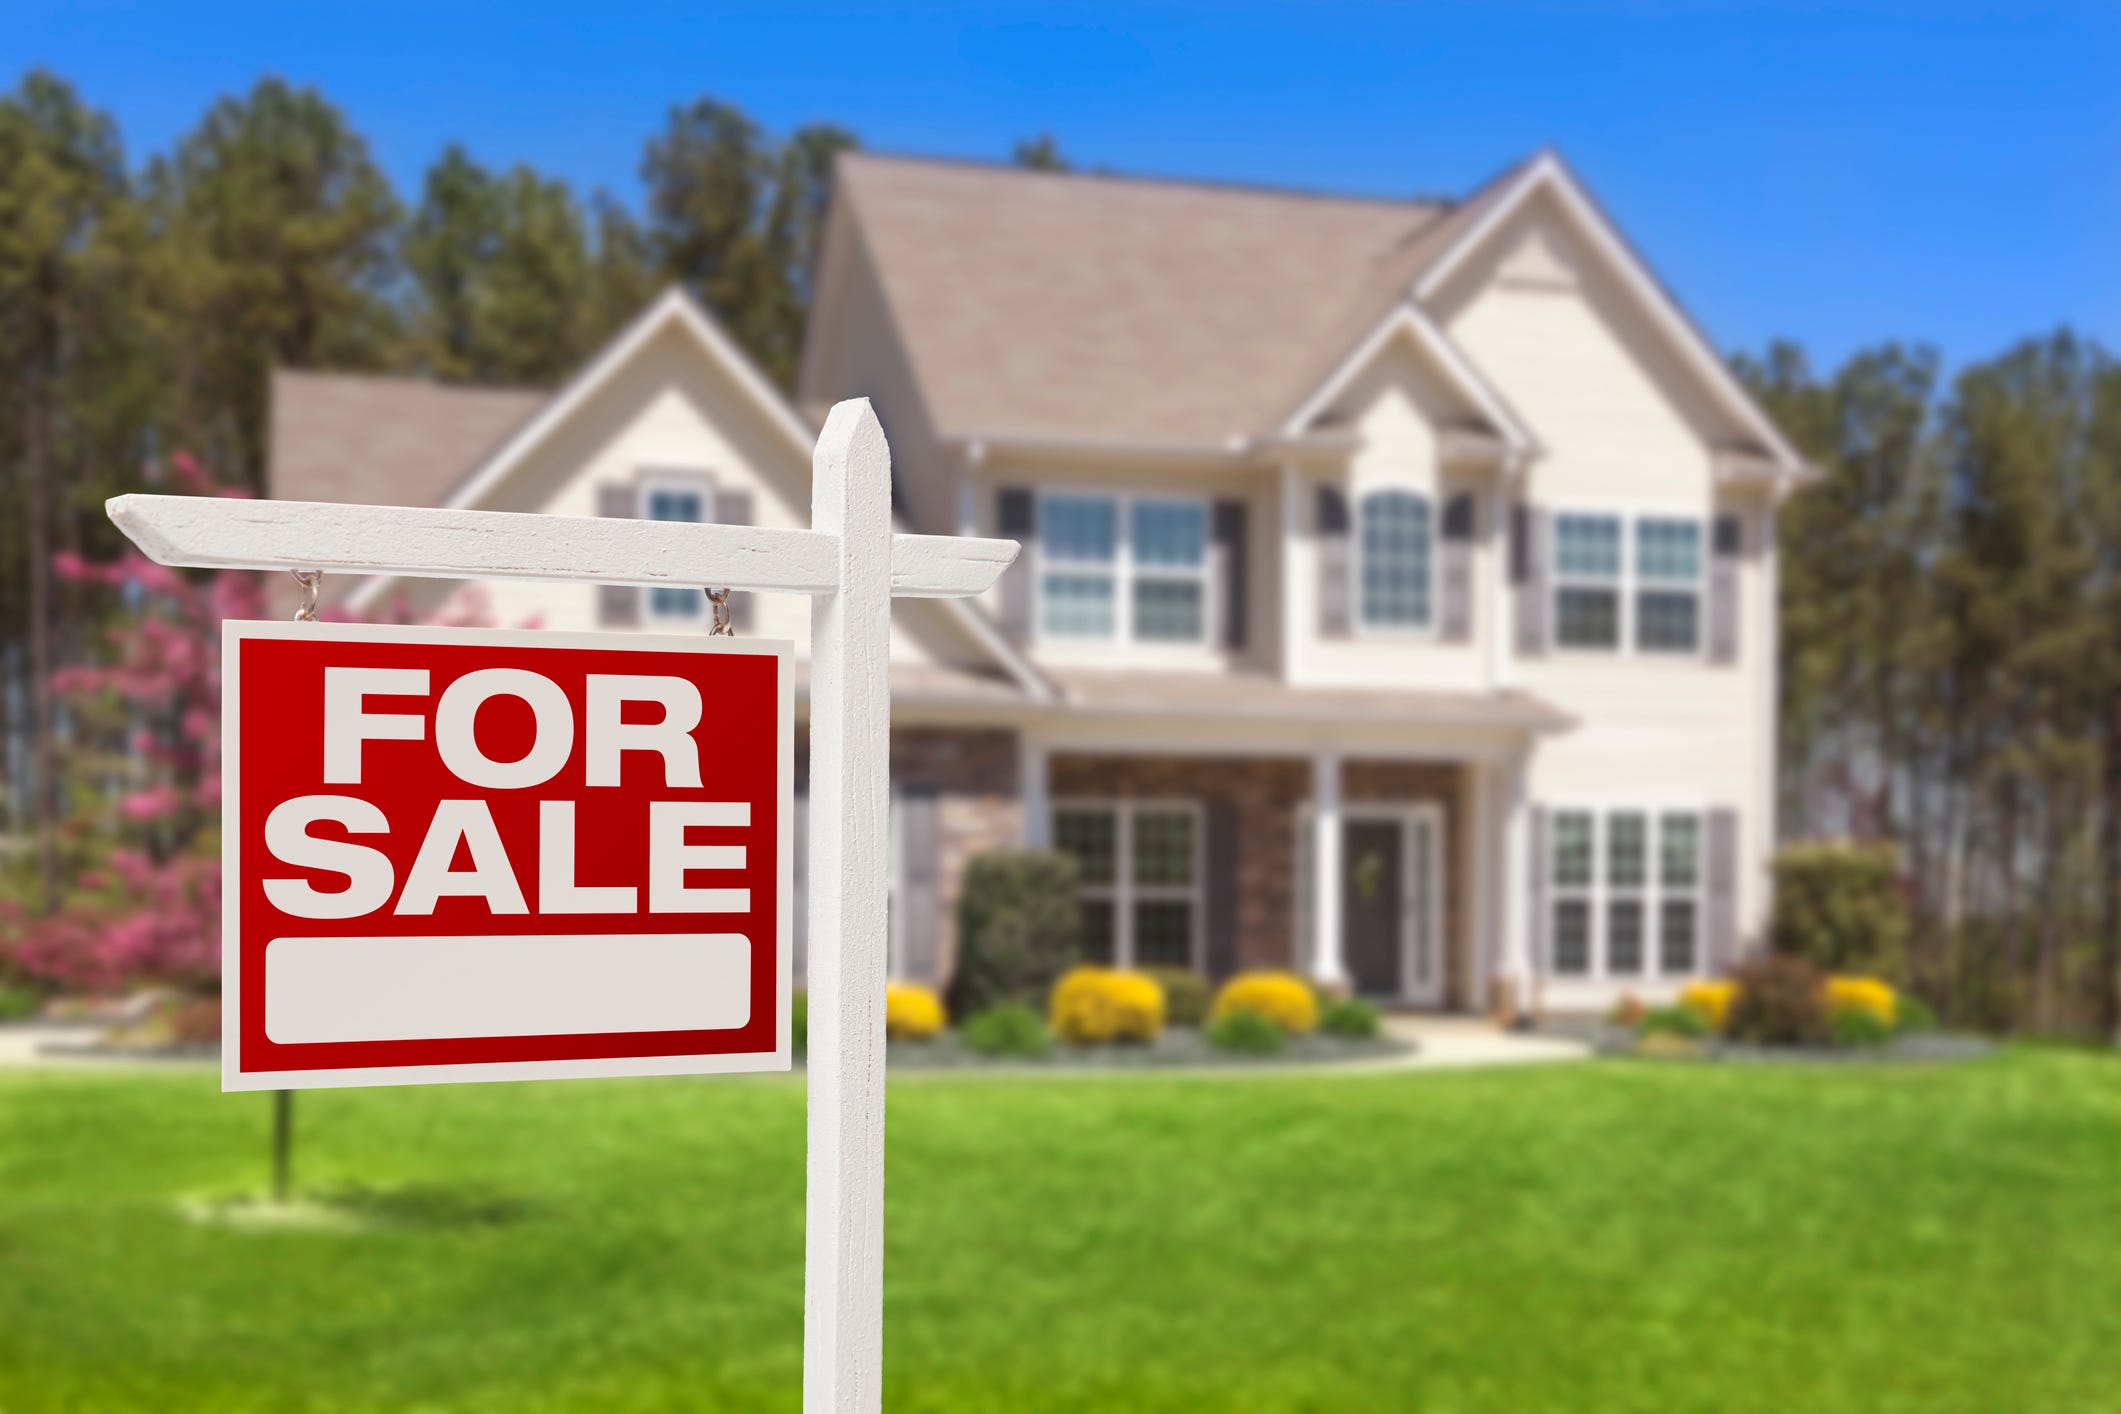

Hello! In this notebook I shall analyze the dataset by using visualizations, then the features that affect the Total is determined by using correlation heatmap and by using Ordinary Least Square Method to determine the P value and elimintae the features that do not affect the Total by using Backward Elimination Method.

Once the necessary features are determined we shall run various regression models to determine the r2 score of each model. The regression models used are,
1. Multivariate Regression
2. Polynomial Regression
3. Random Forest Regression

So lets begin!

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [ ]:
#load the second version that is v2 csv file
dataset = pd.read_csv("/kaggle/input/brasilian-houses-to-rent/houses_to_rent_v2.csv")

In [ ]:
#check the contents of first 5 rows
dataset.head()

In [ ]:
#check the length or number of rows
len(dataset)

In [ ]:
#check the datatyoes
dataset.dtypes

In [ ]:
#check for null values
dataset.isnull().sum()

In [ ]:
#describe the dataset as a table
dataset.describe().T

In [ ]:
#visualizing the number of rooms
sns.catplot("rooms", data = dataset, kind = "count", height = 6)

In [ ]:
#visualizing animals
sns.catplot("animal", data = dataset, kind = "count", height = 6)

In [ ]:
#visualizing furniture
sns.catplot("furniture", data = dataset, kind = "count", height = 6)

In [ ]:
#renaming the total columns 
dataset = dataset.rename(columns = {'total (R$)' : 'Total'}, errors = 'raise')

In [ ]:
#determine the price with respect to area 
plt.figure(figsize=(10,6))
sns.distplot(dataset[dataset.city=='São Paulo'].Total ,color='maroon',hist=False,label='São Paulo')
sns.distplot(dataset[dataset.city=='Porto Alegre'].Total ,color='black',hist=False,label='Porto Alegre')
sns.distplot(dataset[dataset.city=='Rio de Janeiro'].Total ,color='green',hist=False,label='Rio de Janeiro')
sns.distplot(dataset[dataset.city=='Belo Horizonte'].Total ,color='blue',hist=False,label='Belo Horizonte')
sns.distplot(dataset[dataset.city=='Campinas'].Total ,color='orange',hist=False,label='Campinas')
plt.xlim(0,20000)

In [ ]:
#total with respect to animals
plt.figure(figsize=(10,6))
sns.distplot(dataset[dataset.animal=='acept'].Total ,color='maroon',hist=False,label='accept')
sns.distplot(dataset[dataset.animal=='not acept'].Total ,color='black',hist=False,label='not accept')
plt.xlim(0,20000)

In [ ]:
#total with respect to furniture
plt.figure(figsize=(10,6))
sns.distplot(dataset[dataset.furniture=='furnished'].Total ,color='maroon',hist=False,label='Furnished')
sns.distplot(dataset[dataset.furniture=='not furnished'].Total ,color='black',hist=False,label='Unfurnished')
plt.xlim(0,20000)

In [ ]:
#Label Encode the objects
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset.city = le.fit_transform(dataset.city)
dataset.floor = le.fit_transform(dataset.floor)
dataset.animal = le.fit_transform(dataset.animal)
dataset.furniture = le.fit_transform(dataset.furniture)

In [ ]:
#check data type
dataset.dtypes

In [ ]:
#check correlation
dataset.corr().style.background_gradient(cmap = 'coolwarm')

As you can see above, apart from the (R$) values the features that make the most impact are rooms, bathrooms and parking spaces.

To further check the correlation of the features and the features that are most important to determine the Total, let us take the approach of **Backward Elimination Algorithm** by using the Ordinary Least Square method to find the summary of the dataset.

In [ ]:
#dividing into X and y
X = dataset.iloc[:,0:-1].values
y = dataset.iloc[:,-1].values

In [ ]:
#confirming with backward elimination 
import statsmodels.api as sm
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x

In [ ]:
#setting significance level to 0.05
#Optimal values of X taken
SL = 0.05
X_opt = X[:, [0, 1, 2, 3, 4, 5,6,7]]

In [ ]:
#Obtain the features having most importance
X_Modeled = backwardElimination(X_opt, SL)

In [ ]:
X_Modeled

By comapring the values of X modeled with the dataset it can be concluded that the features having the p value less than 0.05 are bathroom, floor, animal and furniture.

Now, lets begin the **Regression**

In [ ]:
#load the values into X and y
#all features except the (R$) features are being taken
X = dataset.iloc[:,0:8].values
y = dataset.iloc[:,12:13].values

In [ ]:
#split into training and test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [ ]:
#multivariate linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [ ]:
#predict value
y_pred = regressor.predict(X_test)

In [ ]:
#calculating the r2 score and mse
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
#r2 score
r2_score(y_test, y_pred)

In [ ]:
#mse value
mean_squared_error(y_test, y_pred)

Clearly the r2 score is very bad, it is infact worse than the median value. This might be because all the features apart from R$ features are taken and some of them have inverse relation and negative coefficients.

Lets now select only the features that were determined by Backward Elimination.

In [ ]:
#loading X with updated features
X = dataset.iloc[:,[3,5,6,7]].values

In [ ]:
#splitting into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [ ]:
#multivariate linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [ ]:
#predict value
y_pred = regressor.predict(X_test)

In [ ]:
#r2 score
r2_score(y_test, y_pred)

In [ ]:
#mse value
mean_squared_error(y_test, y_pred)

It can be seen that the r2 score has improved tremendously. Though it does not have a large value it is in accordance to the correlation value that we saw in the heatmap above.

Next lets check if there is any improvement by using **Polynomial Regression.**

In [ ]:
#polynomial distribution
X = dataset.iloc[:,[3,5,6,7]].values
y = dataset.iloc[:,12:13].values

In [ ]:
#fitting into polynomial equation
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X)

In [ ]:
#split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly,y,test_size = 0.2, random_state = 0)

In [ ]:
#multivariate linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [ ]:
#predict value
y_pred = regressor.predict(X_test)

In [ ]:
#r2 score
r2_score(y_test, y_pred)

In [ ]:
#mse value
mean_squared_error(y_test, y_pred)

Here, the r2 score has infact fallen a bit from 0.16 to 0.1521. Maybe Multivariate Regression was better than Polynomial? Lets now check the **Random Forest Regression**.

In [ ]:
#load X and y
X = dataset.iloc[:,[3,5,6,7]].values
y = dataset.iloc[:,-1].values

In [ ]:
#split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly,y,test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 5)
regressor.fit(X_train, y_train)

In [ ]:
#predicting the value
y_pred = regressor.predict(X_test)

In [ ]:
#r2 score
r2_score(y_test, y_pred)

The r2 score of the Random Forest Regressor is worse than that of the Multivariate and the Polynomial Regression. 

It can be concluded that for this particular dataset the Multivariate Linear Regression shows the best behaviour of the Total with respect to select features. Ofcourse the R$ values werent taken as that would just some up to form the Total and there would not be any real predictions if the values were known.

This is my second notebook and I would love to hear some feedback and maybe even upvotes if you liked it!
Thank You!